In [1]:
import pandas as pd

file = pd.read_csv("loan_2007_2014.csv")
file.describe()

D:\Works\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [2]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [54]:
file['open_il_12m'].fillna(0, inplace = True)


Series([], Name: open_il_12m, dtype: float64)

In [56]:
[file['open_il_12m']!= 0]

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 466280    False
 466281    False
 466282    False
 466283    False
 466284    False
 Name: open_il_12m, Length: 466285, dtype: bool]

In [3]:
type(file["grade"][0])

str

In [4]:
file["grade"].dtypes

dtype('O')

In [5]:
file["grade"]

0         B
1         C
2         C
3         C
4         B
         ..
466280    C
466281    D
466282    D
466283    A
466284    D
Name: grade, Length: 466285, dtype: object

## Data Analysis ##


## Data preparation
### 1. Filtering

In [6]:
file["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [7]:
import numpy as np

#condition
non_numeric_val = (file['emp_length'] == '< 1 year') | (file["emp_length"] == '10+ years')  | (file['emp_length'] == 'NaN')

#create column
file['emp_length_int'] = file['emp_length']

#filtering using condition
file['emp_length_int'][non_numeric_val] = file['emp_length_int'][non_numeric_val].str.replace('< 1 year', str(0))
file['emp_length_int'][non_numeric_val] = file['emp_length_int'][non_numeric_val].str.replace('\+ years', '')
file['emp_length_int'][non_numeric_val] = file['emp_length_int'][non_numeric_val].str.replace('NaN', str(0))

#filtering
file['emp_length_int'] = file['emp_length_int'].str.replace('years', '')
file['emp_length_int'] = file['emp_length_int'].str.replace('year', '')

#numerize values and fillna()
file['emp_length_int'] = pd.to_numeric(file['emp_length_int'].fillna(str(0)), downcast = 'integer')

#NuLL percentage
file['emp_length_int'][file['emp_length_int'] == 0].count() / file['emp_length_int'].value_counts().sum() * 100

D:\Works\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Works\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
D:\Works\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Works\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A

12.282831315611697

In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## HOMEWORK

# 2) issues date


In [9]:
file['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [10]:
file['mths_since_issue_d'] = pd.to_datetime('2017-12-01', format = '%Y-%m-%d') - pd.to_datetime(file['issue_d'], format = '%b-%y')

In [11]:
file['mths_since_issue_d']

0        2192 days
1        2192 days
2        2192 days
3        2192 days
4        2192 days
            ...   
466280   1430 days
466281   1430 days
466282   1430 days
466283   1430 days
466284   1430 days
Name: mths_since_issue_d, Length: 466285, dtype: timedelta64[ns]

In [12]:
file['mths_since_issue_d'] = round(file['mths_since_issue_d'] / np.timedelta64(1, 'M'))


In [13]:
file['mths_since_issue_d']

0         72.0
1         72.0
2         72.0
3         72.0
4         72.0
          ... 
466280    47.0
466281    47.0
466282    47.0
466283    47.0
466284    47.0
Name: mths_since_issue_d, Length: 466285, dtype: float64

In [14]:
file['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

# CATEGORICAL VALUES

In [15]:
pd.get_dummies(file['grade'], prefix = 'grade', prefix_sep = ':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [16]:
file_dummies = pd.concat([pd.get_dummies(file['grade'], prefix = 'grade', prefix_sep = ':'),
                          pd.get_dummies(file['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                          pd.get_dummies(file['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                          pd.get_dummies(file['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                          pd.get_dummies(file['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                          pd.get_dummies(file['purpose'], prefix = 'purpose', prefix_sep = ':'),
                          pd.get_dummies(file['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                          pd.get_dummies(file['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')], axis = 1)

In [17]:
file_dummies


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
466281,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466282,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466283,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
data = pd.concat([file, file_dummies], axis = 1)
data[data["addr_state:AZ"] == 1]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0,0,0,0,0,0,0,0,1,0
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,0,0,0,0,0,0,0,0,1,0
10,10,1070078,1305201,6500,6500,6500.0,60 months,14.65,153.45,C,...,0,0,0,0,0,0,0,0,1,0
38,38,1069356,1304250,6000,6000,6000.0,36 months,12.42,200.50,B,...,0,0,0,0,0,0,0,0,1,0
88,88,1068694,1303326,12000,12000,12000.0,36 months,16.29,423.61,D,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466068,466068,10156612,12008656,6625,6625,6625.0,36 months,12.85,222.75,B,...,0,0,0,0,0,0,0,0,1,0
466137,466137,10175962,12028033,10000,10000,10000.0,36 months,21.48,379.22,E,...,0,0,0,0,0,0,0,0,1,0
466221,466221,9848214,11700040,20000,20000,19875.0,36 months,8.90,635.07,A,...,0,0,0,0,0,0,0,0,1,0
466222,466222,9878016,11729853,9000,9000,9000.0,36 months,8.90,285.78,A,...,0,0,0,0,0,0,0,0,0,1


# HANDLING MISSING VALUES

In [19]:
data['annual_inc'].describe()

count    4.662810e+05
mean     7.327738e+04
std      5.496357e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.896000e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

In [20]:
data['annual_inc'].isna().sum()

4

In [21]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace = True)

In [22]:
data['annual_inc'].isna().sum()

0

In [23]:
num_missing_col = ['acc_now_delinq','total_acc', 'pub_rec', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'emp_length_int']
data[num_missing_col].fillna(0, inplace = True)
data

D:\Works\Anaconda\lib\site-packages\pandas\core\frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0,0,0,0,0,0,0,0,1,0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,0,0,0,0,0,0,0,0,1,0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0,0,0,0,0,0,0,0,1,0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0,0,0,0,0,0,0,0,1,0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,1,0,0,0,0,0,0,0,0,1
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,0,0,0,0,0,0,0,0,1,0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,0,0,0,0,0,0,0,0,1,0
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,0,0,0,0,0,0,0,0,0,1


In [24]:
data.isna().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 203, dtype: int64

In [25]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [26]:
data['good_bad_status'] = np.where(data['loan_status'].isin(["Charged Off", "Default", "Late (16-30 days)", "Does not meet the credit policy. Status:Charged Off"]), 0, 1)

In [27]:
data['good_bad_status']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad_status, Length: 466285, dtype: int32

In [28]:
from sklearn.model_selection import train_test_split
data['good_bad_status']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad_status, Length: 466285, dtype: int32

In [29]:
train_inputs, test_inputs, train_target, test_target = train_test_split(data.drop('good_bad_status', axis = 1), data['good_bad_status'])

In [30]:
train_inputs

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
262996,262996,33351735,35995082,12575,12575,12575.0,60 months,24.99,369.02,F,...,0,0,0,0,0,0,0,0,1,0
135659,135659,5374698,6726865,9600,9600,9550.0,36 months,14.09,328.53,B,...,0,0,0,0,0,0,0,0,1,0
410130,410130,14417885,16470283,15600,15600,15600.0,36 months,12.99,525.56,B,...,0,0,0,0,0,0,0,0,0,1
432604,432604,12437503,14449630,9000,9000,9000.0,36 months,17.57,323.44,D,...,1,0,0,0,0,0,0,0,1,0
404657,404657,14670097,16732389,24500,24500,24500.0,36 months,8.90,777.96,A,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13336,13336,784755,988002,7500,7500,7500.0,36 months,15.23,260.84,C,...,0,0,0,0,0,0,0,0,1,0
191260,191260,1608336,1879906,12000,12000,12000.0,60 months,14.33,281.28,C,...,0,0,0,0,0,0,0,0,1,0
49327,49327,9010273,10801893,6000,6000,6000.0,36 months,13.53,203.70,B,...,0,0,0,0,0,0,0,0,1,0
374483,374483,18414564,20577245,28000,28000,28000.0,36 months,8.39,882.47,A,...,0,0,0,0,0,0,0,0,0,1


In [31]:
train_target

262996    1
135659    1
410130    1
432604    1
404657    1
         ..
13336     1
191260    1
49327     1
374483    1
249103    1
Name: good_bad_status, Length: 349713, dtype: int32

In [32]:
test_inputs

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
231425,231425,37681189,40454136,10000,10000,10000.0,36 months,6.99,308.73,A,...,0,1,0,0,0,0,0,0,0,1
196572,196572,1548663,1814510,17000,17000,17000.0,36 months,18.49,618.78,D,...,1,0,0,0,0,0,0,0,1,0
172033,172033,2644971,3187147,22750,22750,22750.0,60 months,19.05,590.78,D,...,0,0,0,0,0,0,0,0,1,0
188514,188514,1680944,1963497,12000,12000,12000.0,36 months,10.16,388.11,B,...,0,0,0,0,0,0,0,0,1,0
50218,50218,9726450,11578225,19600,19600,19600.0,36 months,11.99,650.91,B,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290289,290289,29654749,32187960,6000,6000,5900.0,36 months,12.49,200.70,B,...,0,0,0,0,0,0,0,0,0,1
359780,359780,20157327,22420048,2000,2000,2000.0,36 months,15.61,69.93,D,...,0,0,0,0,0,0,0,0,0,1
306679,306679,27560985,30064092,17000,17000,17000.0,36 months,7.12,525.85,A,...,0,0,0,0,0,0,0,0,0,1
258570,258570,31347288,33910525,9100,9100,9100.0,36 months,16.49,322.14,D,...,0,0,0,0,0,0,0,0,1,0


In [33]:
test_target

231425    1
196572    1
172033    1
188514    1
50218     1
         ..
290289    1
359780    1
306679    1
258570    1
56456     1
Name: good_bad_status, Length: 116572, dtype: int32

# PROCESSING DISCRETE VALUES: AUTOMATING CALCULATIONS


In [65]:
import numpy as np
def woe_cal(data, independent_variable_col, target_df):
    data = pd.concat([data[independent_variable_col], target_df], axis = 1)
    data = pd.concat([data.groupby(data.columns.values[0], as_index = False)[data.columns.values[1]].count(), 
                      data.groupby(data.columns.values[0], as_index = False)[data.columns.values[1]].mean() ], axis =1)
    
    data = data.iloc[:, [0, 1, 3]]
    #prop_good_targets = mean()
    data.columns = [independent_variable_col, 'target_num', 'prop_good_target']
    data['prop_target'] = data['target_num'] / data['target_num'].sum()
    data['n_good_target'] = data['target_num'] * data['prop_good_target']
    data['n_bad_target'] = (1 - data['prop_good_target']) * data['target_num']
    data['prop_good_target'] = data['n_good_target'] / data['n_good_target'].sum()
    data['prop_bad_target'] = data['n_bad_target'] / data['n_bad_target'].sum()
    data['WOE'] = np.log(data['prop_good_target'] / data['prop_bad_target'])
    data['IV'] = (data['prop_good_target'] - data['prop_bad_target']) * data['WOE']
    data['IV'] = data['IV'].sum()
    return data


In [66]:
data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [67]:
woe_cal(train_inputs, 'grade', train_target).sort_values(by = ['prop_target', 'prop_good_target'], ascending = [False, False])

,grade,target_num,prop_good_target,prop_target,n_good_target,n_bad_target,prop_bad_target,WOE,IV
1,B,102785,0.302652,0.293912,95545.0,7240.0,0.212816,0.352154,0.277552
2,C,93830,0.266997,0.268306,84289.0,9541.0,0.280453,-0.049169,0.277552
3,D,57698,0.157812,0.164987,49820.0,7878.0,0.231570,-0.383479,0.277552
0,A,55985,0.171138,0.160088,54027.0,1958.0,0.057554,1.089739,0.277552
4,E,26905,0.070676,0.076935,22312.0,4593.0,0.135009,-0.647230,0.277552
5,F,10002,0.024755,0.028601,7815.0,2187.0,0.064286,-0.954307,0.277552
6,G,2508,0.005971,0.007172,1885.0,623.0,0.018313,-1.120685,0.277552


In [73]:
sub_grade_woe = woe_cal(train_inputs, 'sub_grade', train_target).sort_values(by = ['prop_target', 'prop_good_target'], ascending = [False, False])

In [39]:
woe_cal(train_inputs, 'funded_amnt', train_target).sort_values(by = ['prop_target', 'prop_good_target'], ascending = [False, False])

D:\Works\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,independent_variable,target_num,prop_good_target,prop_target,n_good_target,n_bad_target,prop_bad_target,WOE,IV
370,10000,24815,0.071519,0.070958,22578.0,2237.0,0.065755,0.084019,inf
450,12000,19087,0.055728,0.054579,17593.0,1494.0,0.043915,0.238222,inf
570,15000,17471,0.050765,0.049958,16026.0,1445.0,0.042475,0.178281,inf
770,20000,16988,0.049349,0.048577,15579.0,1409.0,0.041417,0.175222,inf
1345,35000,12421,0.035329,0.035518,11153.0,1268.0,0.037272,-0.053554,inf
...,...,...,...,...,...,...,...,...,...
8,925,1,0.000000,0.000003,0.0,1.0,0.000029,-inf,inf
1133,29075,1,0.000000,0.000003,0.0,1.0,0.000029,-inf,inf
1249,32150,1,0.000000,0.000003,0.0,1.0,0.000029,-inf,inf
1269,32675,1,0.000000,0.000003,0.0,1.0,0.000029,-inf,inf


In [40]:
woe_cal(train_inputs, 'acc_now_delinq', train_target).sort_values(by = ['prop_target', 'prop_good_target'], ascending = [False, False])

,independent_variable,target_num,prop_good_target,prop_target,n_good_target,n_bad_target,prop_bad_target,WOE,IV
0,0.0,348393,0.996271,0.996285,314498.0,33895.0,0.996414,-0.000143,inf
1,1.0,1222,0.003507,0.003495,1107.0,115.0,0.003381,0.036624,inf
2,2.0,67,0.000193,0.000192,61.0,6.0,0.000176,0.091262,inf
3,3.0,6,0.000016,0.000017,5.0,1.0,0.000029,-0.618415,inf
4,4.0,3,0.000010,0.000009,3.0,0.0,0.000000,inf,inf
5,5.0,1,0.000003,0.000003,1.0,0.0,0.000000,inf,inf


In [41]:
woe_cal(train_inputs, 'mths_since_issue_d', train_target).sort_values(by = ['prop_target', 'prop_good_target'], ascending = [False, False])

,independent_variable,target_num,prop_good_target,prop_target,n_good_target,n_bad_target,prop_bad_target,WOE,IV
2,38.0,29183,0.087734,0.083448,27697.0,1486.0,0.043680,0.697415,0.198611
5,41.0,21933,0.064841,0.062717,20470.0,1463.0,0.043004,0.410650,0.198611
1,37.0,18822,0.057188,0.053821,18054.0,768.0,0.022575,0.929511,0.198611
8,44.0,14305,0.041610,0.040905,13136.0,1169.0,0.034362,0.191386,0.198611
7,43.0,14228,0.041506,0.040685,13103.0,1125.0,0.033069,0.227237,0.198611
...,...,...,...,...,...,...,...,...,...
88,124.0,53,0.000124,0.000152,39.0,14.0,0.000412,-1.203317,0.198611
89,125.0,47,0.000130,0.000134,41.0,6.0,0.000176,-0.306009,0.198611
75,111.0,43,0.000114,0.000123,36.0,7.0,0.000206,-0.590213,0.198611
87,123.0,43,0.000098,0.000123,31.0,12.0,0.000353,-1.278741,0.198611


In [42]:
woe_cal(train_inputs, 'zip_code', train_target).sort_values(by = ['prop_target', 'prop_good_target'], ascending = [False, False])

D:\Works\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,independent_variable,target_num,prop_good_target,prop_target,n_good_target,n_bad_target,prop_bad_target,WOE,IV
833,945xx,3940,0.011305,0.011266,3569.0,371.0,0.010905,0.036017,inf
94,112xx,3818,0.010779,0.010918,3403.0,415.0,0.012199,-0.123687,inf
662,750xx,3741,0.010821,0.010697,3416.0,325.0,0.009553,0.124579,inf
543,606xx,3576,0.010472,0.010226,3306.0,270.0,0.007937,0.277251,inf
82,100xx,3330,0.009661,0.009522,3050.0,280.0,0.008230,0.160286,inf
...,...,...,...,...,...,...,...,...,...
479,524xx,1,0.000000,0.000003,0.0,1.0,0.000029,-inf,inf
526,587xx,1,0.000000,0.000003,0.0,1.0,0.000029,-inf,inf
595,663xx,1,0.000000,0.000003,0.0,1.0,0.000029,-inf,inf
614,682xx,1,0.000000,0.000003,0.0,1.0,0.000029,-inf,inf


In [45]:
woe_cal(train_inputs, 'home_ownership', train_target).sort_values(by = ['prop_target', 'prop_good_target'], ascending = [False, False])

,independent_variable,target_num,prop_good_target,prop_target,n_good_target,n_bad_target,prop_bad_target,WOE,IV
0,MORTGAGE,176975,0.512691,0.506058,161853.0,15122.0,0.444503,0.142716,0.021528
4,RENT,141377,0.397449,0.404266,125472.0,15905.0,0.467519,-0.162373,0.021528
3,OWN,31178,0.089384,0.089153,28218.0,2960.0,0.087008,0.026949,0.021528
2,OTHER,147,0.000380,0.000420,120.0,27.0,0.000794,-0.736167,0.021528
1,NONE,36,0.000095,0.000103,30.0,6.0,0.000176,-0.618384,0.021528


In [46]:
woe_cal(train_inputs, 'sub_grade', train_target).sort_values(by = ['prop_target', 'prop_good_target'], ascending = [False, False])

,independent_variable,target_num,prop_good_target,prop_target,n_good_target,n_bad_target,prop_bad_target,WOE,IV
7,B3,23657,0.069517,0.067647,21946.0,1711.0,0.050294,0.323685,0.301392
8,B4,22872,0.066774,0.065402,21080.0,1792.0,0.052675,0.237171,0.301392
10,C1,20163,0.058044,0.057656,18324.0,1839.0,0.054056,0.071168,0.301392
6,B2,20030,0.059552,0.057276,18800.0,1230.0,0.036155,0.499021,0.301392
11,C2,19966,0.057157,0.057093,18044.0,1922.0,0.056496,0.011625,0.301392
9,B5,18987,0.055057,0.054293,17381.0,1606.0,0.047208,0.153809,0.301392
12,C3,18921,0.053831,0.054104,16994.0,1927.0,0.056643,-0.050926,0.301392
13,C4,18150,0.051233,0.051900,16174.0,1976.0,0.058083,-0.125491,0.301392
5,B1,17239,0.051753,0.049295,16338.0,901.0,0.026484,0.669922,0.301392
14,C5,16630,0.046732,0.047553,14753.0,1877.0,0.055173,-0.166050,0.301392


In [48]:
woe_cal(train_inputs, 'open_il_12m', train_target).sort_values(by = ['prop_target', 'prop_good_target'], ascending = [False, False])

,independent_variable,target_num,prop_good_target,prop_target,n_good_target,n_bad_target,prop_bad_target,WOE,IV


In [50]:
train_inputs

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
262996,262996,33351735,35995082,12575,12575,12575.0,60 months,24.99,369.02,F,...,0,0,0,0,0,0,0,0,1,0
135659,135659,5374698,6726865,9600,9600,9550.0,36 months,14.09,328.53,B,...,0,0,0,0,0,0,0,0,1,0
410130,410130,14417885,16470283,15600,15600,15600.0,36 months,12.99,525.56,B,...,0,0,0,0,0,0,0,0,0,1
432604,432604,12437503,14449630,9000,9000,9000.0,36 months,17.57,323.44,D,...,1,0,0,0,0,0,0,0,1,0
404657,404657,14670097,16732389,24500,24500,24500.0,36 months,8.90,777.96,A,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13336,13336,784755,988002,7500,7500,7500.0,36 months,15.23,260.84,C,...,0,0,0,0,0,0,0,0,1,0
191260,191260,1608336,1879906,12000,12000,12000.0,60 months,14.33,281.28,C,...,0,0,0,0,0,0,0,0,1,0
49327,49327,9010273,10801893,6000,6000,6000.0,36 months,13.53,203.70,B,...,0,0,0,0,0,0,0,0,1,0
374483,374483,18414564,20577245,28000,28000,28000.0,36 months,8.39,882.47,A,...,0,0,0,0,0,0,0,0,0,1


In [57]:
woe_cal(train_inputs, 'recoveries', train_target).sort_values(by = ['prop_target', 'prop_good_target'], ascending = [False, False])

D:\Works\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,independent_variable,target_num,prop_good_target,prop_target,n_good_target,n_bad_target,prop_bad_target,WOE,IV
0,0.00,331405,1.0,0.947649,315693.0,15712.0,0.461846,0.772524,inf
48,10.00,7,0.0,0.000020,0.0,7.0,0.000206,-inf,inf
63,10.20,7,0.0,0.000020,0.0,7.0,0.000206,-inf,inf
170,11.70,7,0.0,0.000020,0.0,7.0,0.000206,-inf,inf
6482,800.00,7,0.0,0.000020,0.0,7.0,0.000206,-inf,inf
...,...,...,...,...,...,...,...,...,...
17372,24862.10,1,0.0,0.000003,0.0,1.0,0.000029,-inf,inf
17373,25000.29,1,0.0,0.000003,0.0,1.0,0.000029,-inf,inf
17374,27750.00,1,0.0,0.000003,0.0,1.0,0.000029,-inf,inf
17375,29623.35,1,0.0,0.000003,0.0,1.0,0.000029,-inf,inf


In [58]:
woe_cal(train_inputs, 'verification_status', train_target).sort_values(by = ['prop_target', 'prop_good_target'], ascending = [False, False])

,independent_variable,target_num,prop_good_target,prop_target,n_good_target,n_bad_target,prop_bad_target,WOE,IV
2,Verified,126049,0.353394,0.360436,111564.0,14485.0,0.425779,-0.186337,0.022396
1,Source Verified,112338,0.324125,0.321229,102324.0,10014.0,0.294356,0.096339,0.022396
0,Not Verified,111326,0.322481,0.318335,101805.0,9521.0,0.279865,0.141738,0.022396


# VISUALIZING DATA

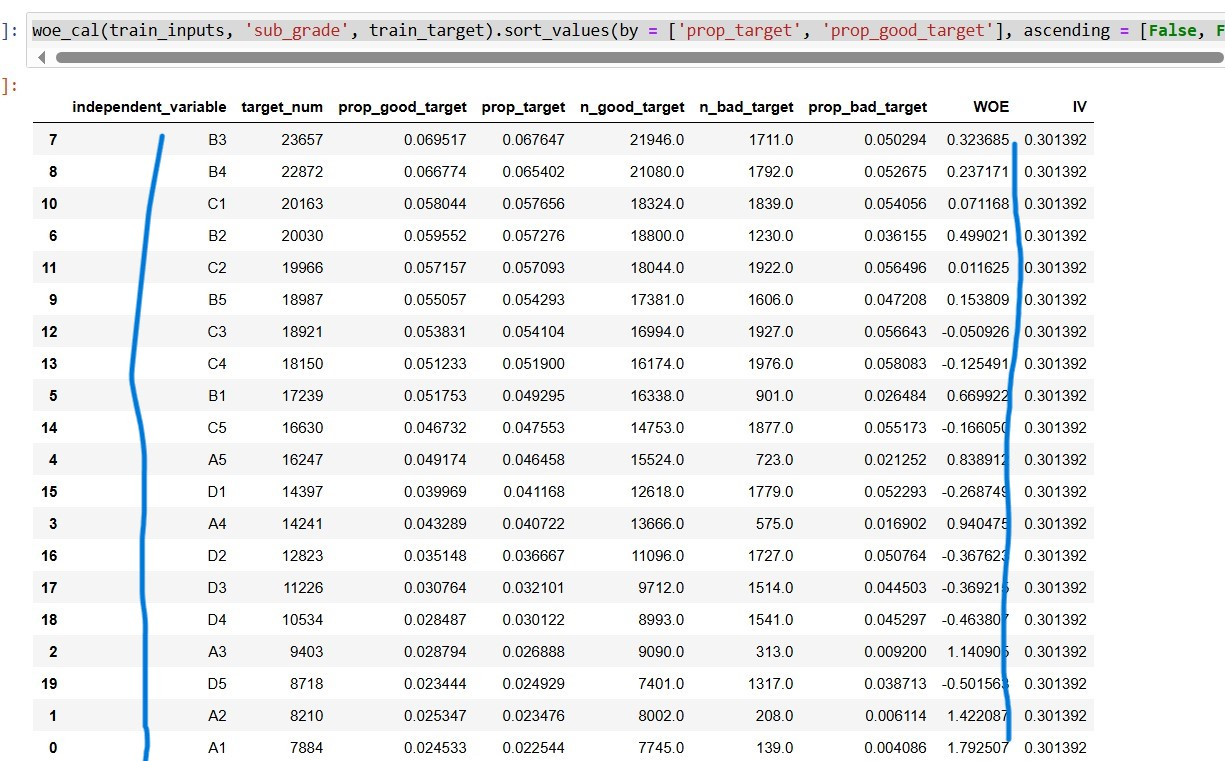

In [63]:
from IPython.display import Image
Image("C:/Users/A715-71G/OneDrive - VNU-HCMUS/Desktop/1.jpg")

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [105]:
def plot_by_woe(data_woe, rotation_of_x_axis_labels = False):
    x = np.array(data_woe.iloc[:, 0].apply(str))
    y = data_woe['WOE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k' )
    plt.xlabel(data_woe.columns.values[0])
    plt.ylabel('Weight of Evidence')
    plt.title('Plot Weight Of Evidence By ' + data_woe.columns.values[0])
    plt.xticks(rotation = rotation_of_x_axis_labels)

    
    

In [106]:
sub_grade_woe

,sub_grade,target_num,prop_good_target,prop_target,n_good_target,n_bad_target,prop_bad_target,WOE,IV
7,B3,23657,0.069517,0.067647,21946.0,1711.0,0.050294,0.323685,0.301392
8,B4,22872,0.066774,0.065402,21080.0,1792.0,0.052675,0.237171,0.301392
10,C1,20163,0.058044,0.057656,18324.0,1839.0,0.054056,0.071168,0.301392
6,B2,20030,0.059552,0.057276,18800.0,1230.0,0.036155,0.499021,0.301392
11,C2,19966,0.057157,0.057093,18044.0,1922.0,0.056496,0.011625,0.301392
9,B5,18987,0.055057,0.054293,17381.0,1606.0,0.047208,0.153809,0.301392
12,C3,18921,0.053831,0.054104,16994.0,1927.0,0.056643,-0.050926,0.301392
13,C4,18150,0.051233,0.051900,16174.0,1976.0,0.058083,-0.125491,0.301392
5,B1,17239,0.051753,0.049295,16338.0,901.0,0.026484,0.669922,0.301392
14,C5,16630,0.046732,0.047553,14753.0,1877.0,0.055173,-0.166050,0.301392


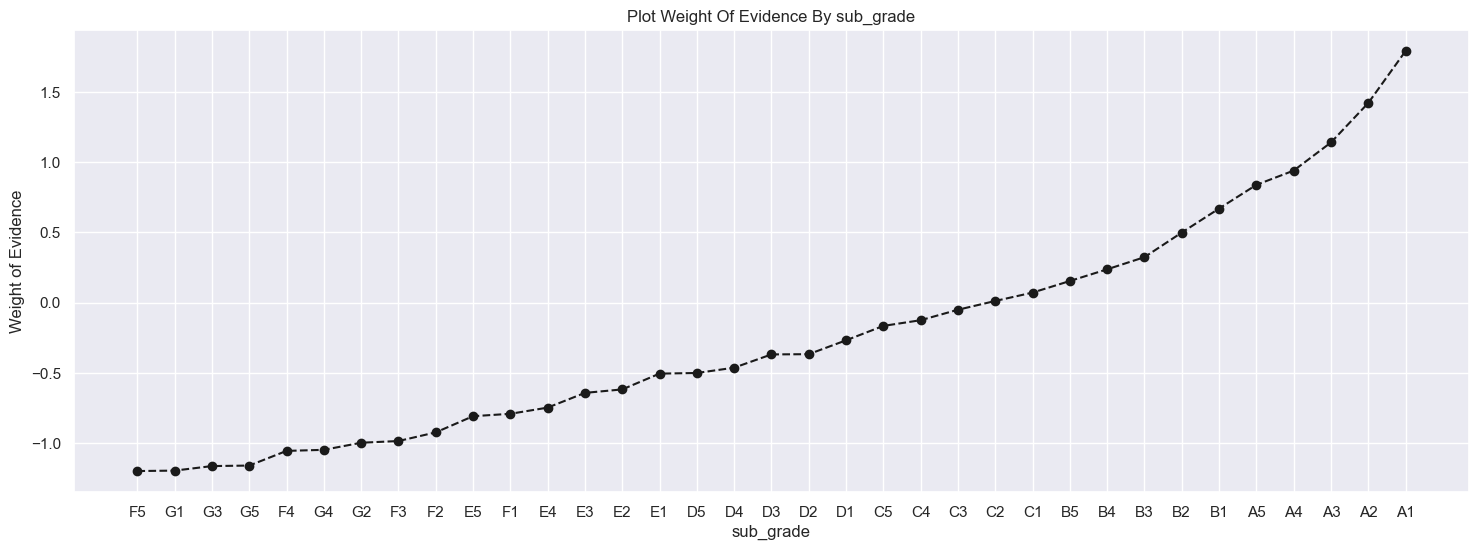

In [109]:
plot_by_woe(sub_grade_woe.sort_values(by = ['WOE']), False)

In [110]:
woe_cal(train_inputs, 'initial_list_status', train_target).sort_values(by = ['prop_target', 'prop_good_target'], ascending = [False, False])

,initial_list_status,target_num,prop_good_target,prop_target,n_good_target,n_bad_target,prop_bad_target,WOE,IV
0,f,227164,0.640629,0.649573,202242.0,24922.0,0.732569,-0.134108,0.039498
1,w,122549,0.359371,0.350427,113451.0,9098.0,0.267431,0.295495,0.039498


In [111]:
woe_cal(train_inputs, 'purpose', train_target).sort_values(by = ['prop_target', 'prop_good_target'], ascending = [False, False])

,purpose,target_num,prop_good_target,prop_target,n_good_target,n_bad_target,prop_bad_target,WOE,IV
2,debt_consolidation,205446,0.585322,0.587470,184782.0,20664.0,0.607407,-0.037038,0.044323
1,credit_card,78291,0.229505,0.223872,72453.0,5838.0,0.171605,0.290728,0.044323
4,home_improvement,19912,0.057670,0.056938,18206.0,1706.0,0.050147,0.139778,0.044323
9,other,17703,0.048858,0.050622,15424.0,2279.0,0.066990,-0.315634,0.044323
6,major_purchase,7450,0.021480,0.021303,6781.0,669.0,0.019665,0.088274,0.044323
11,small_business,5283,0.013377,0.015107,4223.0,1060.0,0.031158,-0.845545,0.044323
0,car,4013,0.011666,0.011475,3683.0,330.0,0.009700,0.184569,0.044323
7,medical,3480,0.009699,0.009951,3062.0,418.0,0.012287,-0.236479,0.044323
8,moving,2229,0.006031,0.006374,1904.0,325.0,0.009553,-0.459935,0.044323
12,vacation,1853,0.005204,0.005299,1643.0,210.0,0.006173,-0.170650,0.044323


In [112]:
woe_cal(train_inputs, 'verification_status', train_target).sort_values(by = ['prop_target', 'prop_good_target'], ascending = [False, False])

,verification_status,target_num,prop_good_target,prop_target,n_good_target,n_bad_target,prop_bad_target,WOE,IV
2,Verified,126049,0.353394,0.360436,111564.0,14485.0,0.425779,-0.186337,0.022396
1,Source Verified,112338,0.324125,0.321229,102324.0,10014.0,0.294356,0.096339,0.022396
0,Not Verified,111326,0.322481,0.318335,101805.0,9521.0,0.279865,0.141738,0.022396
